<a href="https://colab.research.google.com/github/NQT2906/CS114.K21/blob/Thi_GK/Thi_GK_18521470_Round_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clone data from git**

**Load dữ liệu từ github ở link "https://github.com/NQT2906/CS114.K21" về và đặt tên là Dataset**

In [0]:
!git clone "https://github.com/NQT2906/CS114.K21" Dataset

Cloning into 'Dataset'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 805 (delta 49), reused 61 (delta 17), pack-reused 677
Receiving objects: 100% (805/805), 935.83 MiB | 15.84 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (1306/1306), done.


In [0]:
cd Dataset/Time

/content/Dataset/Time


# **Import library**

**Import những thư viện cần thiết lúc đầu**

In [0]:
import pandas as pd

# **Read data**

**Đọc dữ liệu với phương thức read_csv của thư viện pandas. 'data2.txt' là tên của file dữ liệu, sep = ',' là cho dữ liệu thêm 1 cột khi gặp dấu ','.
data.columns = ['Size', 'Time'] là đặt tên cho 2 cột dữ liệu vừa chia là Size và Time.**

In [0]:
data = pd.read_csv('data2.txt', sep = ',', header = None)
data.columns = ['Size', 'Time']

In [0]:
X = data.iloc[:, 0].values.reshape(-1, 1)
Y = data.iloc[:, 1]

# **Split data to train and test**

**Chia bộ dữ liệu làm 2 phần là train và test nhờ vào phương thức train_test_split của thư viện sklearn với train_size = 80%**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

# **Choose model**

**Do input của bộ dữ liệu chỉ có 1 biến là Size nên ta dùng Linear Regression cho bộ dữ liệu này**

In [0]:
from sklearn.linear_model import LinearRegression

**Train model bằng phương thức fit của LinearRegression()**

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Y_train_pred và Y_test_pred là 2 biến chứa dữ liệu dự đoán. Cách để thực hiện dự đoán bằng model: Tên_model.predict(Tập_dữ_liệu_đầu_vào).**

In [0]:
Y_train_pred = lin_reg.predict(X_train)
Y_test_pred = lin_reg.predict(X_test)

# **Visualize data and model**

**Dùng thư viện matplotlib.pyplot để visualize bộ dữ liệu và model và dữ liệu dữ liệu.**

In [0]:
import matplotlib.pyplot as plt

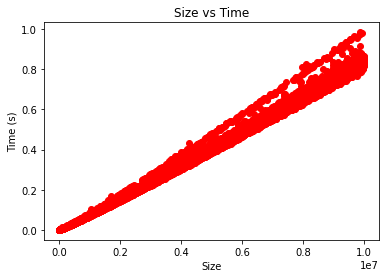

In [0]:
plt.scatter(X_train, Y_train, color = 'red')
plt.title('Size vs Time')
plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.show()

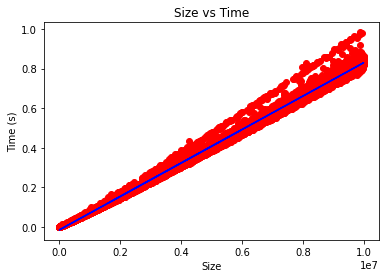

In [0]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, Y_train_pred, color = 'blue')
plt.title('Size vs Time')
plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.show()

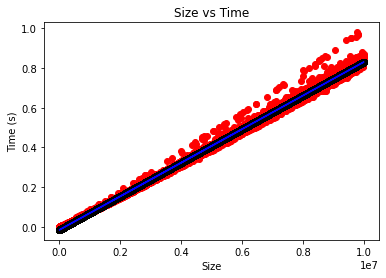

In [0]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, Y_train_pred, color = 'blue')
plt.scatter(X_test, Y_test_pred, color = 'black')
plt.title('Size vs Time')
plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.show()

# **Evaluate**

**Đánh giá model. Ở đây em dùng độ đo R2_score của thư viện sklearn.metrics để đánh giá độ tốt của model. Kết quả cho ra 0.99763 cho tập train và 0.99744 cho tập test. Kết quả khá cao -> Đây là 1 model tốt.**

In [0]:
from sklearn.metrics import r2_score
print(r2_score(Y_train, Y_train_pred))
print(r2_score(Y_test, Y_test_pred))

0.9976304661685358
0.9974404167783946


# **Lưu model**

In [0]:
import pickle

In [0]:
filename = 'Linear_Regression_Size_Time.sav'
pickle.dump(lin_reg, open(filename, 'wb'))